# Linear Regression from Scratch

## Introduction

**Linear Regression** is one of the simplest and most commonly used algorithms in Machine Learning. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find a linear equation that best represents the relationship.

**How Does It Work?**
Linear Regression follows this equation:

$
y = wX + b
$

where:
- **y** is the predicted value
- **X** is the feature matrix
- **w** (weights) represents the coefficients of the model
- **b** (bias) is the intercept

The model learns by minimizing the error between the actual and predicted values using **Gradient Descent**.

**Applications:**
- **Predicting house prices**: Estimating property values based on various features.
- **Stock market trends**: Forecasting future stock prices using historical data.
- **Sales forecasting**: Predicting future sales based on past trends and influencing factors.
- **Healthcare analytics**: Identifying trends in medical data for disease prediction.

**Advantages and Limitations:**
- It's easy to implement and understand.
- Works well for small to moderately large datasets.
- Not suitable for complex relationships where features interact non-linearly.
- Outliers can significantly impact the model’s performance.
- Feature scaling tehniques like Standardization or Min-Max Scaling may be necessary for optimal results.

## Mathematical Background

### **Mean Squared Error (MSE)**
The Mean Squared Error (MSE) is the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily because the errors are squared.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
$$

where: **$Y_{i}$** is the actual target value, **$\hat{Y}_{i}$** is the predicted value and **n** is the number of data points.

### **Mean Absolute Error (MAE)**
The Mean Absolute Error (MAE) is the average of the absolute differences between the actual and predicted values. It gives an intuitive measure of the error in the same units as the target variable.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|
$$

where: **$Y_{i}$** is the actual target value, **$\hat{Y}_{i}$** is the predicted value and **n** is the number of data points.

### **R-Squared (R²) Score**
R-Squared (R²) score is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where $y_{i}$ is the actual target value, $\hat{y}_{i}$ is the predicted value, and $\bar{y}$ is the mean of the actual target values.

### **Gradient Descent**
To minimize the MSE, we update weights using **Gradient Descent**:

$$
w = w - \alpha \cdot \frac{\partial J}{\partial w}
$$
$$
b = b - \alpha \cdot \frac{\partial J}{\partial b}
$$

where **$\alpha$** is the learning rate, and **$\frac{\partial J}{\partial w}$** and **$\frac{\partial J}{\partial b}$** are the gradients (derivatives) of the cost function with respect to **$w$** and **$b$**, respectively.

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

## Implementing the Linear Regression Class

In [2]:
class LinearRegression:
    def __init__(self, *, lr=0.01, epochs=1000):
        """
        Initializes the Linear Regression model (using Gradient Descent)
        - lr (float): Learning rate for gradient descent, defaults to 0.01
        - epochs (int): Number of iterations for training, defaults to 1000
        """

        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Trains the model using gradient descent
        - X (np.ndarray): Feature matrix of shape (n_samples, n_features)
        - y (np.ndarray): Target values of shape (n_samples,)
        """

        n_samples, n_features = X.shape
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Compute predictions
            y_pred = np.dot(X, self.weights) + self.bias
            # Compute gradient for weights
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            # Compute gradient for bias
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Makes predictions using the trained model
        - X (np.ndarray): Feature matrix of shape (n_samples, n_features)
        """

        if self.weights is None or self.bias is None:
            raise ValueError("Model is not trainder yet. Call 'fit' before 'predict'.")

        return np.dot(X, self.weights) + self.bias

    def evaluate(self, y_true: np.ndarray, y_pred: np.ndarray) -> str:
        """
        Computes Mean Squared Error (MSE), Mean Absolute Error (MAE),
        and R-squared (R²) Score
        - y_true (np.ndarray): Actual target values.
        - y_pred (np.ndarray): Predicted target values.
        """
        
        mse = np.mean((y_true - y_pred) ** 2)
        mae = np.mean(np.abs(y_true - y_pred))
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
        ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
        r2 = 1 - (ss_residual / ss_total)

        result = (
            f"Mean Squared Error (MSE): {mse:.3f}\n"
            f"Mean Absolute Error (MAE): {mae:.3f}\n"
            f"R-squared (R²) Score: {r2:.3f}"
        )

        return result

## Generating Synthetic Data and Visualization

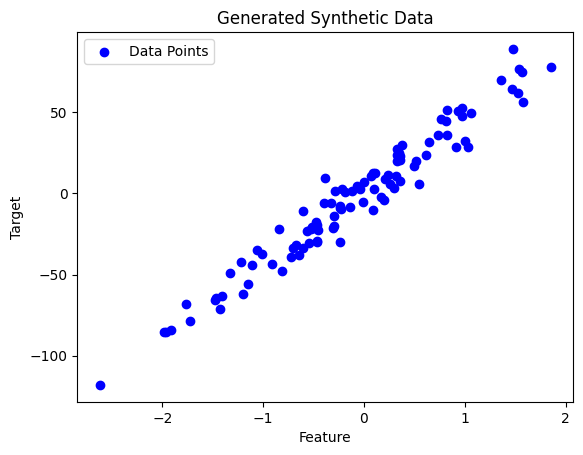

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

plt.scatter(X, y, color="blue", label="Data Points")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Generated Synthetic Data")
plt.legend()
plt.show()

## Training and Testing the Model

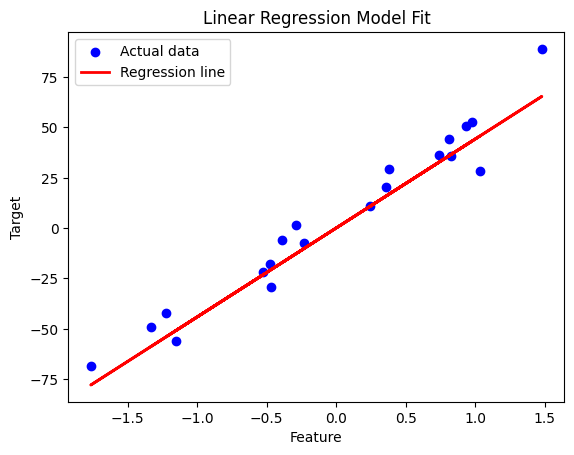

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(lr=0.01, epochs=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Model Fit")
plt.legend()
plt.show()

## Evaluation

MAE measures the average absolute difference between actual and predicted values. MSE also measures error but squares the differences before averaging them, giving more weight to larger errors. For both metrics, **lower values indicate better predictions**, meaning the model is more accurate.

The R² Score shows how well the model explains the variance in the data. It ranges from 0 to 1, though it can be negative if the model performs worse than simply predicting the mean. **A higher R² value is better**, as it means the model captures more of the variation in the target variable.

In [5]:
# Printing evaluation metrics
print(model.evaluate(y_test, y_pred))

Mean Squared Error (MSE): 104.297
Mean Absolute Error (MAE): 8.421
R-squared (R²) Score: 0.937
